11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8796 - loss: 0.3800 - val_accuracy: 0.9851 - val_loss: 0.0463
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9782 - loss: 0.0705 - val_accuracy: 0.9874 - val_loss: 0.0366
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9836 - loss: 0.0526 - val_accuracy: 0.9888 - val_loss: 0.0330
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9880 - loss: 0.0385 - val_accuracy: 0.9909 - val_loss: 0.0256
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9893 - loss: 0.0306 - val_accuracy: 0.9920 - val_loss: 0.0268
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0273 - val_accuracy: 0.9926 - val_loss: 0.0240
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0218 - val_accuracy: 0.9921 - val_loss: 0.0287
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9938 - loss: 0.0194 -

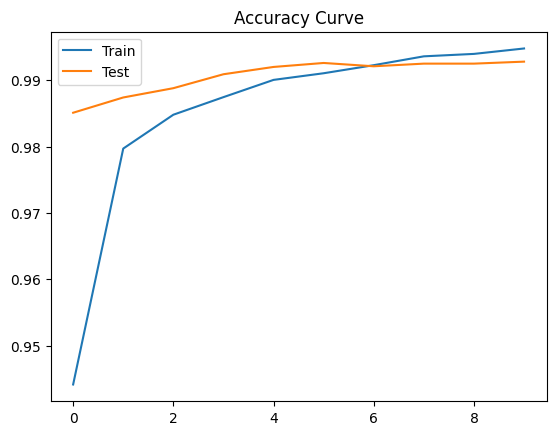

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0344
Final Test Accuracy: 0.9927999973297119


In [1]:
# ------------------------------
# CNN on MNIST Handwritten Digits
# ------------------------------

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocessing
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1) / 255.0

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Test")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Final Test Accuracy:", test_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


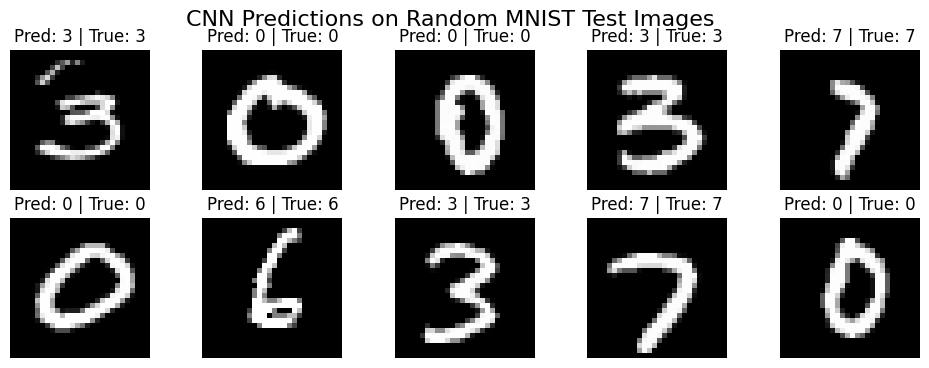

In [2]:
# ---------------------------
# Inference on Test Images
# ---------------------------

import numpy as np
import matplotlib.pyplot as plt

# Pick 10 random test images
indices = np.random.choice(len(x_test), 10)
images = x_test[indices]
labels = y_test[indices]

preds = model.predict(images)
pred_classes = np.argmax(preds, axis=1)

# Display predictions
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {pred_classes[i]} | True: {labels[i]}")
    plt.axis('off')
plt.suptitle("CNN Predictions on Random MNIST Test Images", fontsize=16)
plt.show()
